In [2]:
# ================================
# 1. Import libraries and load data
# ================================
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display, Markdown

df = pd.read_csv('../data/SAML-D.csv')

# Quick view of the data
display(df.shape)
df.head()

(9504852, 12)

,Time,Date,Sender_account,Receiver_account,Amount,Payment_currency,Received_currency,Sender_bank_location,Receiver_bank_location,Payment_type,Is_laundering,Laundering_type
0,10:35:19,2022-10-07,8724731955,2769355426,1459.15,UK pounds,UK pounds,UK,UK,Cash Deposit,0,Normal_Cash_Deposits
1,10:35:20,2022-10-07,1491989064,8401255335,6019.64,UK pounds,Dirham,UK,UAE,Cross-border,0,Normal_Fan_Out
2,10:35:20,2022-10-07,287305149,4404767002,14328.44,UK pounds,UK pounds,UK,UK,Cheque,0,Normal_Small_Fan_Out
3,10:35:21,2022-10-07,5376652437,9600420220,11895.00,UK pounds,UK pounds,UK,UK,ACH,0,Normal_Fan_In
4,10:35:21,2022-10-07,9614186178,3803336972,115.25,UK pounds,UK pounds,UK,UK,Cash Deposit,0,Normal_Cash_Deposits


In [10]:
# Title
display(Markdown("## Exploratory Data Analysis (EDA)"))

## Exploratory Data Analysis (EDA)

In [7]:
# ===============================
# 2. Basic information
# ===============================
# Check structure, data types, and memory usage

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9504852 entries, 0 to 9504851
Data columns (total 12 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   Time                    object 
 1   Date                    object 
 2   Sender_account          int64  
 3   Receiver_account        int64  
 4   Amount                  float64
 5   Payment_currency        object 
 6   Received_currency       object 
 7   Sender_bank_location    object 
 8   Receiver_bank_location  object 
 9   Payment_type            object 
 10  Is_laundering           int64  
 11  Laundering_type         object 
dtypes: float64(1), int64(3), object(8)
memory usage: 870.2+ MB


In [ ]:
# Descriptive statistics for numerical columns
df.describe()

,Sender_account,Receiver_account,Amount,Is_laundering
count,9.504852e+06,9.504852e+06,9.504852e+06,9.504852e+06
mean,5.006619e+09,5.006006e+09,8.762968e+03,1.038733e-03
std,2.885814e+09,2.884763e+09,2.561495e+04,3.221263e-02
min,9.018000e+03,9.018000e+03,3.730000e+00,0.000000e+00
25%,2.513133e+09,2.513219e+09,2.143688e+03,0.000000e+00
50%,5.001017e+09,5.002572e+09,6.113720e+03,0.000000e+00
75%,7.505051e+09,7.502397e+09,1.045846e+04,0.000000e+00
max,9.999987e+09,9.999971e+09,1.261850e+07,1.000000e+00


In [ ]:
# Check for missing values
df.isna().sum()

Time                      0
Date                      0
Sender_account            0
Receiver_account          0
Amount                    0
Payment_currency          0
Received_currency         0
Sender_bank_location      0
Receiver_bank_location    0
Payment_type              0
Is_laundering             0
Laundering_type           0
dtype: int64

In [11]:
# Check for duplicates
df.duplicated().sum()

np.int64(0)

Is_laundering
0    9494979
1       9873
Name: count, dtype: int64


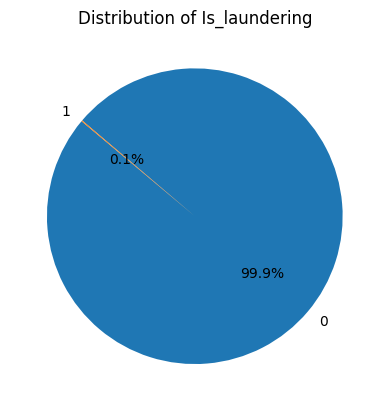

In [ ]:
# ===============================
# 3. Target Is_laundering variable analysis
# ===============================

# Distribution of the target 'Is_laundering'
laundering_counts = df['Is_laundering'].value_counts()
print(laundering_counts)
#plt.figure(figsize=(6,4))
plt.pie(laundering_counts, labels=laundering_counts.index, autopct='%1.1f%%', startangle=140)

plt.title('Distribution of Is_laundering')
plt.show()



In [26]:
# ===============================
# 4. Univariate analysis
# ===============================

# Analysis of 'Payment_type' frequency
# number of transactions per payment type
transactions_per_payment_type = df['Payment_type'].value_counts()
display(transactions_per_payment_type)


Payment_type
Credit card        2012909
Debit card         2012103
Cheque             2011419
ACH                2008807
Cross-border        933931
Cash Withdrawal     300477
Cash Deposit        225206
Name: count, dtype: int64

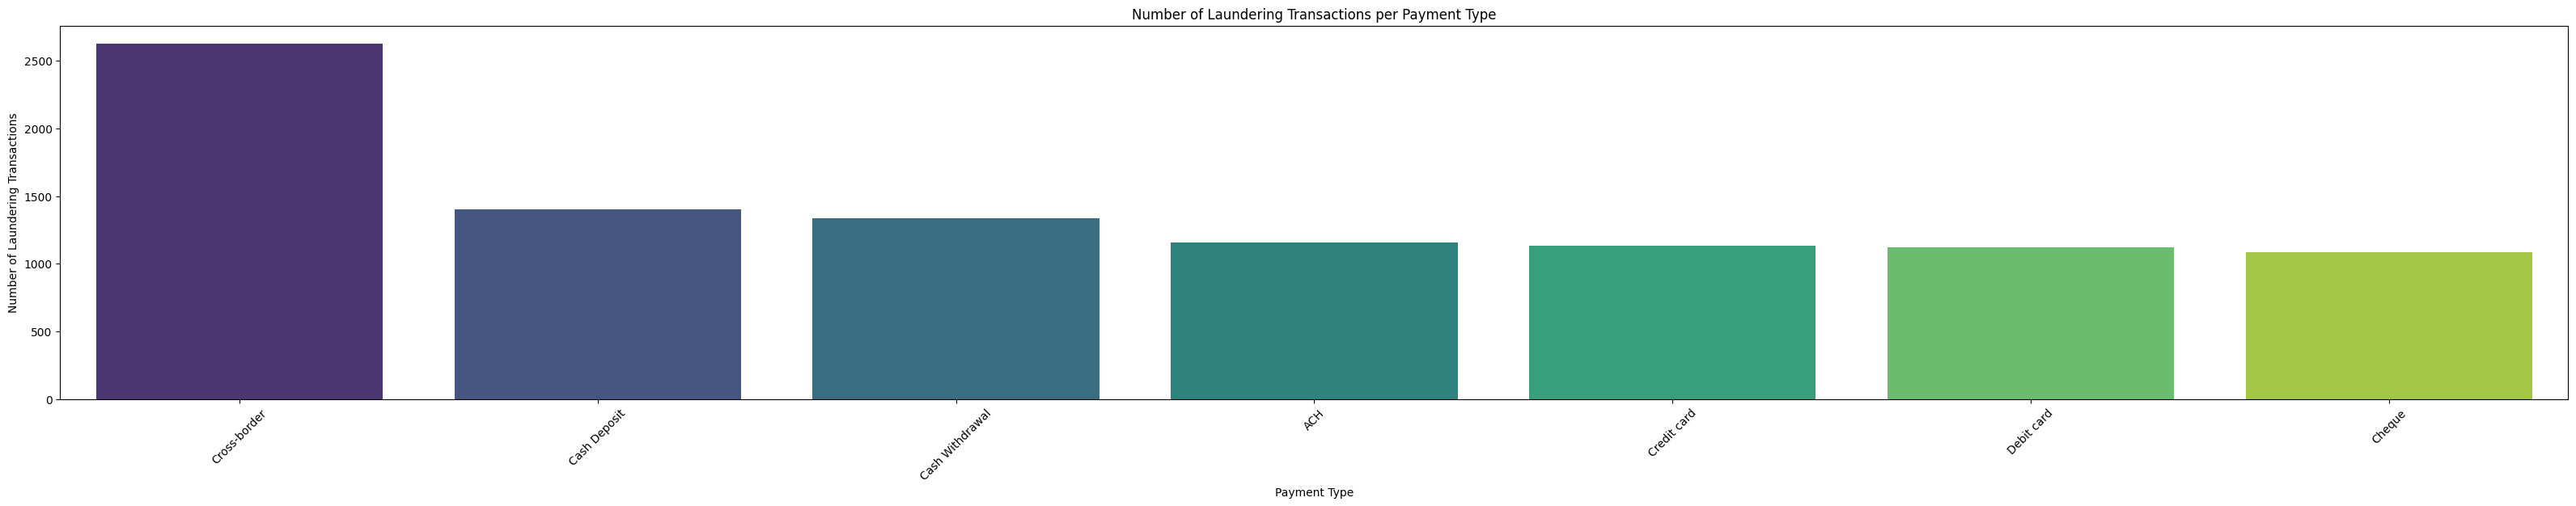

In [ ]:
# ===============================
# 5. Bivariate analysis with target
# ===============================

# Analysis of 'Payment_type' vs 'Is_laundering'
# number of laundering transactions per payment type
laundering_transactions_per_payment_type = (
    df[df['Is_laundering'] == 1]
    .groupby('Payment_type')
    .size()
    .sort_values(ascending=False)
)

# Convert to dataFrame for better handling
laundering_df = laundering_transactions_per_payment_type.reset_index()
laundering_df.columns = ['Payment_type', 'Laundering_transactions'] # <-- Rename columns for the counts 

# Plot
plt.figure(figsize=(40,6))
sns.barplot(
    data=laundering_df,
    x='Payment_type',
    y='Laundering_transactions',
    hue='Payment_type',
    legend=False,
    palette='viridis', 
    order=laundering_df['Payment_type']
)

plt.title('Number of Laundering Transactions per Payment Type')
plt.xlabel('Payment Type')
plt.ylabel('Number of Laundering Transactions')
plt.xticks(rotation=45)
plt.show()

In [27]:
# Comparison table
comparison = pd.DataFrame({
    'Total_Transactions': transactions_per_payment_type,
    'Laundering_Transactions': laundering_transactions_per_payment_type
}).sort_values(by='Laundering_Transactions', ascending=False)    

# Calculate percentage of laundering transactions
comparison['%_Laundering'] = (
    comparison['Laundering_Transactions'] / comparison['Total_Transactions'] * 100
).round(2)

display(comparison)

,Total_Transactions,Laundering_Transactions,%_Laundering
Payment_type,,,
Cross-border,933931,2628,0.28
Cash Deposit,225206,1405,0.62
Cash Withdrawal,300477,1334,0.44
ACH,2008807,1159,0.06
Credit card,2012909,1136,0.06
Debit card,2012103,1124,0.06
Cheque,2011419,1087,0.05


In [8]:
sender_bank_location = df['Sender_bank_location'].value_counts()
print(sender_bank_location)
print("\n")
receiver_bank_location = df['Receiver_bank_location'].value_counts()
print(receiver_bank_location)

Sender_bank_location
UK             9183088
Turkey           20902
Switzerland      20503
Pakistan         20346
UAE              20081
Nigeria          20027
Spain            19391
Germany          19259
USA              19027
Italy            18895
France           18702
Japan            18468
Morocco          18437
Austria          18050
Mexico           17662
Albania          17648
India            17596
Netherlands      16770
Name: count, dtype: int64


Receiver_bank_location
UK             8864634
Pakistan         38980
Austria          38844
Albania          38783
Japan            38729
Morocco          38704
Germany          38540
France           38512
Mexico           38385
Nigeria          38272
Netherlands      37314
Spain            37288
India            36936
USA              36850
Italy            36517
Switzerland      36081
UAE              35897
Turkey           35586
Name: count, dtype: int64


In [16]:
countries_stats = df.groupby('Sender_bank_location').size() + df.groupby('Receiver_bank_location').size()
countries = countries_stats.sort_values(ascending=False)
print(countries)

Sender_bank_location
UK             18047722
Pakistan          59326
Nigeria           58299
Germany           57799
France            57214
Japan             57197
Morocco           57141
Austria           56894
Spain             56679
Switzerland       56584
Turkey            56488
Albania           56431
Mexico            56047
UAE               55978
USA               55877
Italy             55412
India             54532
Netherlands       54084
dtype: int64


In [11]:
df['Date'] = pd.to_datetime(df['Date'])
df['Time'] = pd.to_datetime(df['Time'], format='%H:%M:%S').dt.time
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9504852 entries, 0 to 9504851
Data columns (total 12 columns):
 #   Column                  Dtype         
---  ------                  -----         
 0   Time                    object        
 1   Date                    datetime64[ns]
 2   Sender_account          int64         
 3   Receiver_account        int64         
 4   Amount                  float64       
 5   Payment_currency        object        
 6   Received_currency       object        
 7   Sender_bank_location    object        
 8   Receiver_bank_location  object        
 9   Payment_type            object        
 10  Is_laundering           int64         
 11  Laundering_type         object        
dtypes: datetime64[ns](1), float64(1), int64(3), object(7)
memory usage: 870.2+ MB
